<a href="https://colab.research.google.com/github/sindhu7-zero/fish_classifier/blob/main/Fish_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

!cp '/content/drive/MyDrive/fish_project/fish_dataset.zip' /content/
!unzip '/content/fish_dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/KF3D8XIXVZOD.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/KWS8S1W9I9PG.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/LRPEM4RGWRY7.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/ZHYP7L0380A5.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/LA6K9A1Z300T.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/DSTJ0FNZ17NI.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/8HEN19LAPJGS.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/7UQQICO4NVWK.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/OKKCEF9K4K64.jpg  
  in

In [4]:
import os

# Rename the weird folder to something simple
os.rename(
    '/content/images.cv_jzk6llhf18tm3k0kyttxz',
    '/content/fish_project'
)
print("✅ Renamed to /content/fish_project")

✅ Renamed to /content/fish_project


In [5]:
!ls '/content/fish_project/data'

test  train  val


In [6]:
train_path = '/content/fish_project/data/train'
val_path = '/content/fish_project/data/val'
test_path = '/content/fish_project/data/test'

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import *


In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
#load data
train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)
val_gen = val_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)
test_gen = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


In [10]:
model=Sequential()

# Block 1
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Block 3
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Block 4
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(train_gen.class_indices),activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,404,683 (169.39 MB)

 Trainable params: 44,403,211 (169.38 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [ ]:
model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1326s 7s/step - accuracy: 0.5720 - loss: 1.4572 - val_accuracy: 0.0962 - val_loss: 13.6120
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1335s 7s/step - accuracy: 0.8735 - loss: 0.3858 - val_accuracy: 0.2582 - val_loss: 6.5616
Epoch 3/10
 98/195 ━━━━━━━━━━━━━━━━━━━━ 10:42 7s/step - accuracy: 0.9417 - loss: 0.2003

In [16]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"✅ Test Accuracy: {test_acc:.2f}")

100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.7766 - loss: 4.1740
✅ Test Accuracy: 0.78


In [17]:
model.save('/content/fish_classifier.h5')

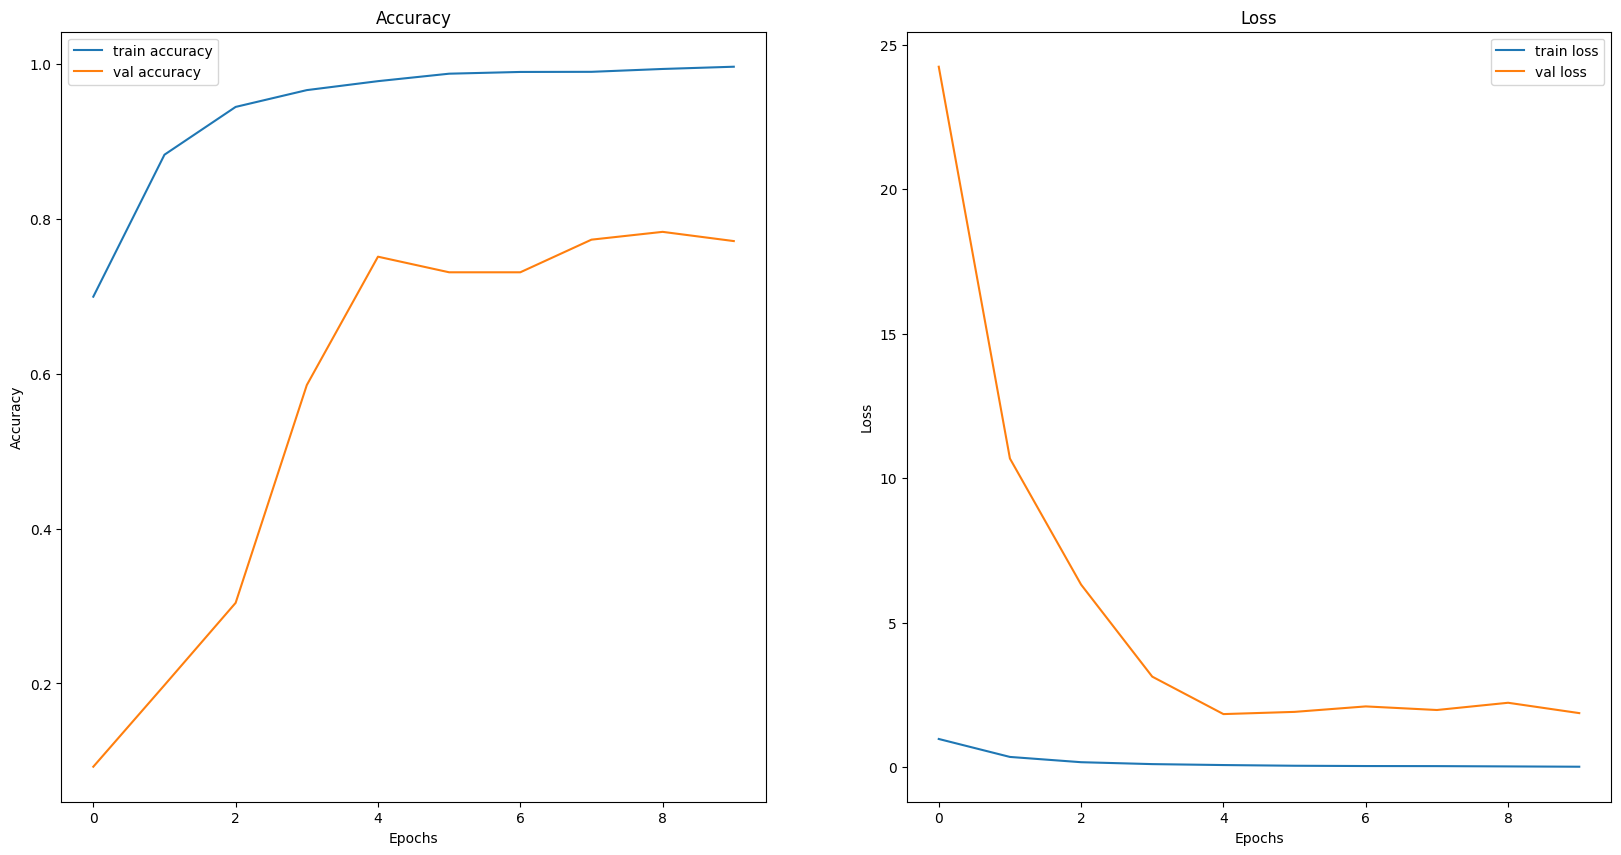

In [18]:
# Visuvalaisation of the model
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(model.history.history['accuracy'],label='train accuracy')
plt.plot(model.history.history['val_accuracy'],label='val accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(model.history.history['loss'],label='train loss')
plt.plot(model.history.history['val_loss'],label='val loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
train_dir = '/content/fish_project/data/train'
val_dir = '/content/fish_project/data/val'

# Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)
val_gen = val_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)
num_classes = len(train_gen.class_indices)
print(f"✅ Found {num_classes} classes")

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
✅ Found 11 classes


In [26]:
# List of models to try
model_configs = [
    ("MobileNetV2", MobileNetV2),
    ("ResNet50", ResNet50),
    ("EfficientNetB0", EfficientNetB0),
    ("DenseNet121", DenseNet121),
    ("VGG16", VGG16)
]

results = {}

for name, BaseModel in model_configs:
    print(f"\n{'='*50}")
    print(f"Training {name}...")
    print(f"{'='*50}")

    # Build model
    base_model = BaseModel(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )
    base_model.trainable = False  # Freeze base

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    # Compile
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train (just 5 epochs for comparison)
    history = model.fit(
        train_gen,
        epochs=5,
        validation_data=val_gen,
        verbose=1
    )

    # Evaluate on full validation set
    val_loss, val_acc = model.evaluate(val_gen, verbose=0)
    results[name] = val_acc

    # Save model (optional)
    model.save(f'/content/{name}_fish_classifier.h5')

    print(f"✅ {name} - Validation Accuracy: {val_acc:.4f}")




Training MobileNetV2...
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 98s 458ms/step - accuracy: 0.4974 - loss: 1.5830 - val_accuracy: 0.9496 - val_loss: 0.2474
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 76s 391ms/step - accuracy: 0.8852 - loss: 0.3695 - val_accuracy: 0.9634 - val_loss: 0.1418
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 77s 395ms/step - accuracy: 0.9231 - loss: 0.2464 - val_accuracy: 0.9679 - val_loss: 0.1169
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 77s 393ms/step - accuracy: 0.9354 - loss: 0.1868 - val_accuracy: 0.9808 - val_loss: 0.0775
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 77s 392ms/step - accuracy: 0.9473 - loss: 0.1665 - val_accuracy: 0.9799 - val_loss: 0.0732


✅ MobileNetV2 - Validation Accuracy: 0.9799

Training ResNet50...
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 103s 473ms/step - accuracy: 0.1294 - loss: 2.5403 - val_accuracy: 0.1996 - val_loss: 2.2356
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 82s 421ms/step - accuracy: 0.1916 - loss: 2.2711 - val_accuracy: 0.1841 - val_loss: 2.1657
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 84s 433ms/step - accuracy: 0.1916 - loss: 2.2250 - val_accuracy: 0.1978 - val_loss: 2.1250
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 83s 427ms/step - accuracy: 0.2025 - loss: 2.1834 - val_accuracy: 0.2097 - val_loss: 2.1052
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 86s 440ms/step - accuracy: 0.2005 - loss: 2.1613 - val_accuracy: 0.2537 - val_loss: 2.0838


✅ ResNet50 - Validation Accuracy: 0.2537

Training EfficientNetB0...
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 121s 513ms/step - accuracy: 0.1426 - loss: 2.3545 - val_accuracy: 0.1712 - val_loss: 2.3275
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 80s 410ms/step - accuracy: 0.1545 - loss: 2.3336 - val_accuracy: 0.1712 - val_loss: 2.3321
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 79s 404ms/step - accuracy: 0.1640 - loss: 2.3365 - val_accuracy: 0.1712 - val_loss: 2.3240
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 82s 419ms/step - accuracy: 0.1530 - loss: 2.3278 - val_accuracy: 0.1712 - val_loss: 2.3186
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 82s 419ms/step - accuracy: 0.1608 - loss: 2.3334 - val_accuracy: 0.1712 - val_loss: 2.3260


✅ EfficientNetB0 - Validation Accuracy: 0.1712

Training DenseNet121...
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 146s 615ms/step - accuracy: 0.3382 - loss: 2.1555 - val_accuracy: 0.9167 - val_loss: 0.4648
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 87s 446ms/step - accuracy: 0.7679 - loss: 0.7158 - val_accuracy: 0.9625 - val_loss: 0.2464
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 87s 444ms/step - accuracy: 0.8492 - loss: 0.4701 - val_accuracy: 0.9698 - val_loss: 0.1701
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 84s 432ms/step - accuracy: 0.8805 - loss: 0.3917 - val_accuracy: 0.9780 - val_loss: 0.1314
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 87s 446ms/step - accuracy: 0.8915 - loss: 0.3393 - val_accuracy: 0.9835 - val_loss: 0.1000


✅ DenseNet121 - Validation Accuracy: 0.9835

Training VGG16...
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 99s 487ms/step - accuracy: 0.1809 - loss: 2.4049 - val_accuracy: 0.6044 - val_loss: 1.7992
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 94s 480ms/step - accuracy: 0.4228 - loss: 1.7889 - val_accuracy: 0.6822 - val_loss: 1.5182
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 93s 473ms/step - accuracy: 0.5374 - loss: 1.5662 - val_accuracy: 0.7491 - val_loss: 1.3384
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 95s 486ms/step - accuracy: 0.6193 - loss: 1.4032 - val_accuracy: 0.7555 - val_loss: 1.2098
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 94s 482ms/step - accuracy: 0.6341 - loss: 1.3000 - val_accuracy: 0.7866 - val_loss: 1.1043


✅ VGG16 - Validation Accuracy: 0.7866



🏆 Final Validation Accuracies:
DenseNet121     : 0.9835
MobileNetV2     : 0.9799
VGG16           : 0.7866
ResNet50        : 0.2537
EfficientNetB0  : 0.1712


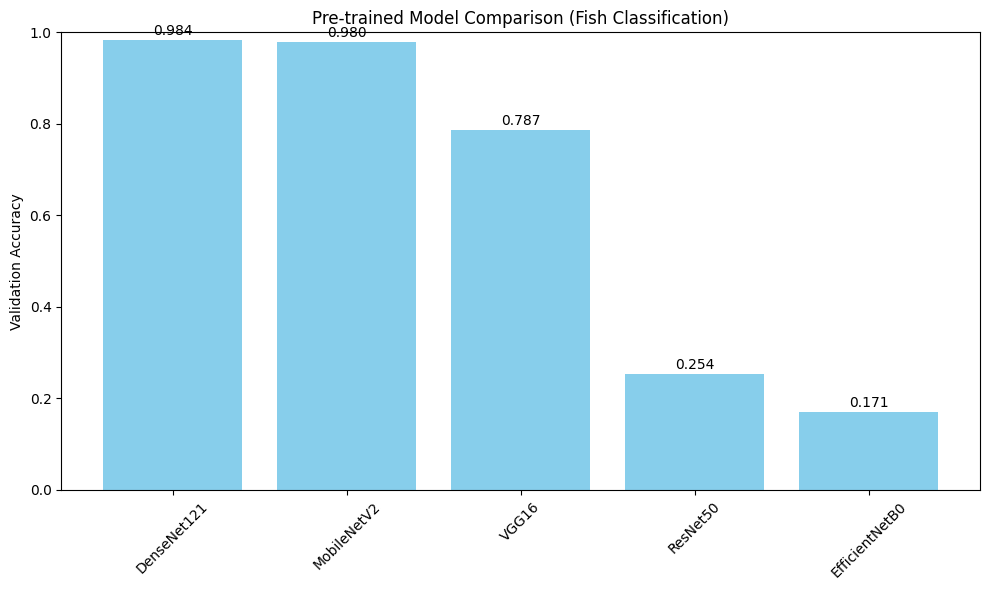

In [27]:
import matplotlib.pyplot as plt

# Sort by accuracy
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

print("\n🏆 Final Validation Accuracies:")
for name, acc in sorted_results:
    print(f"{name:15} : {acc:.4f}")

# Plot
names = [r[0] for r in sorted_results]
accs = [r[1] for r in sorted_results]

plt.figure(figsize=(10, 6))
plt.bar(names, accs, color='skyblue')
plt.title('Pre-trained Model Comparison (Fish Classification)')
plt.ylabel('Validation Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
for i, v in enumerate(accs):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')
plt.tight_layout()
plt.show()

✅ Model saved to Google Drive!
